# CSE 252A Computer Vision I Fall 2018 - Assignment 1
### Instructor: David Kriegman
### Assignment Published On: Tuesday, October 9, 2018
### Due On: Tuesday, October 23, 2018 11:59 pm

## Instructions
* Review the academic integrity and collaboration policies on the course website.
* This assignment must be completed individually.
* This assignment contains theoretical and programming exercises. If you plan to submit hand written answers for theoretical exercises, please be sure your writing is readable and merge those in order with the final pdf you create out of this notebook. You could fill the answers within the notebook iteself by creating a markdown cell.
* Programming aspects of this assignment must be completed using Python in this notebook.
* If you want to modify the skeleton code, you can do so. This has been provided just to provide you with a framework for the solution.
* You may use python packages for basic linear algebra (you can use numpy or scipy for basic operations), but you may not use packages that directly solve the problem.
* If you are unsure about using a specific package or function, then ask the instructor and teaching assistants for clarification.
* You must submit this notebook exported as a pdf. You must also submit this notebook as .ipynb file.
* You must submit both files (.pdf and .ipynb) on Gradescope. You must mark each problem on Gradescope in the pdf.
* **Late policy** - 10% per day late penalty after due date up to 3 days.
---

## Problem 1: Perspective Projection [5 pts]
Consider a perspective projection where a point 
$$
P = [\text{x y z}]^T
$$
is projected onto an image plane $\Pi'$ represented by $k = f'>0$ as shown in the following figure.
<img src="fig1.png">
The first second and third coordinate axes are denoted by $i$, $j$, $k$ respectively. 

Consider the projection of two rays in the world coordinate system
$$
Q1 = [\text{7 -3 1}] + t[\text{8 2 4}]
$$
$$
Q2 = [\text{2 -5 9}] + t[\text{8 2 4}]
$$
where $-\infty \leq t \leq -1$. 

# Calculate the coordinates of the endpoints of the projection of the rays onto the image plane. Identify the vanishing point based on the coordinates.

## Problem 2: Thin Lens Equation [5 pts]
An illuminated arrow forms a real inverted image of itself at a distance of $w = 60\text{ cm}$, measured along the optical axis of a convex thin lens as shown above. The image is half the size of the object
<img src="fig2.png">
1. How far from the object must the lens be placed? Whats is the focal length of the lens?
2. At what distance from the center of the lens should the arrow be placed so that the height of the image is the same?
3. What would be the type and location of image formed if the arrow is placed at a distance of 5 cm along the optical axis from the optical center?

## Problem 3: Affine Projection [3 pts]
Show that the image of a pair of parallel lines in 3D space is a pair of parallel lines in an affine camera.

## Problem 4: Image Formation and Rigid Body Transformations [10 points]

In  this  problem  we  will  practice  rigid  body  transformations  and  image  formations  through  the projective and affine camera model. The goal will be to photograph the following four points 
$$^AP_1 = [\text{-1 -0.5 2}]^T$$,  $$^AP_2 = [\text{1 -0.5 2}]^T$$, $$^AP_3 = [\text{1 0.5 2}]^T$$, $$^AP_4 = [\text{-1 0.5 2}]^T$$

To do this we will need two matrices.  Recall, first, the following formula for rigid body transformation
$$
^BP = \text{ } ^B_AR\text{ }^AP + \text{ } ^BO_A
$$
Where $^BP$ is the point coordinate in the target ($B$) coordinate system. $^AP$ is the point coordinate in the source ($A$) coordinate system. $^B_AR$ is the rotation matrix from $A$ to $B$, and $^BO_A$ is the origin of the coordinate system $A$ expressed in $B$ coordinates. 

The rotation and translation can be combined into a single 4 $\times$ 4 extrinsic parameter matrix, $P_e$, so that $^BP = P_e \cdot \text{ }^AP$.

Once transformed, the points can be photographed using the intrinsic camera matrix, $P_i$ which is a 3 $\times$ 4 matrix.

Once these are found, the image of a point, $^AP$, can be calculated as $P_i \cdot P_e \cdot \text{ }^AP$.

We will consider four different settings of focal length, viewing angles and camera positions below. For each of these calculate:

a) Extrinsic transformation matrix,

b) Intrinsic camera matrix under the perspective camera assumption.

c) Intrinsic camera matrix under the affine camera assumption.  In particular, around what point do you do the taylor series expansion?

d) Calculate the image of the four vertices and plot using the supplied functions

Your output should look something like the following image (Your output values might not match, this is just an example)
<img src="fig3.png">
1. [No rigid body transformation]. Focal  length  =  1. The  optical  axis  of  the  camera  is aligned with the z-axis.
2. [Translation]. $^BO_A = [\text{0 0 1}]^T$. Focal length = 1. The optical axis of the camera is aligned with the z-axis.
3. [Translation and Rotation]. Focal length = 1. $^B_AR$ encodes a 30 degrees around the z-axis and then 60 degrees around the y-axis. $^BO_A = [\text{0 0 1}]^T$.
4. [Translation and Rotation, long distance]. Focal length = 5. $^B_AR$ encodes a 30 degrees around the z-axis and then 60 degrees around the y-axis. $^BO_A = [\text{0 0 13}]^T$.

> You can refer the Richard Szeliski starting page 36 for image formation and the extrinsic matrix.

> Intrinsic matrix calculation for perspective and affine camera models was covered in class and can be referred in slide 3 http://cseweb.ucsd.edu/classes/fa18/cse252A-a/lec3.pdf 

We will not use a full intrinsic camera matrix (e.g.  that maps centimeters to pixels, and defines  the  coordinates  of  the  center  of  the  image),  but  only  parameterize  this  with $f$,  the  focal
length.  In other words:  the only parameter in the intrinsic camera matrix under the perspective assumption is $f$, and the only ones under the affine assumption are: $f,x_0,y_0,z_0$, where $x_0,y_0,z_0$ is the center of the taylor series expansion.

Note that the axis are the same for each row, to facilitate comparison between the two camera models.  Also include:
1. The  actual  points  around  which  you  did  the  taylor  series  expansion  for  the  affine  camera models.
2. How did you arrive at these points?
3. How do the projective and affine camera models differ?  Why is this difference smaller for the last image compared to the second last?

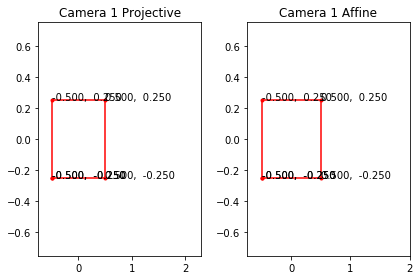

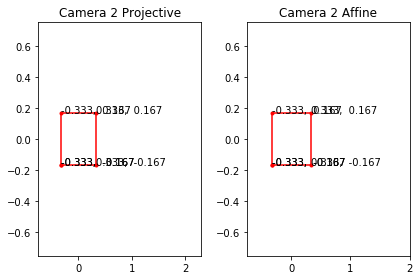

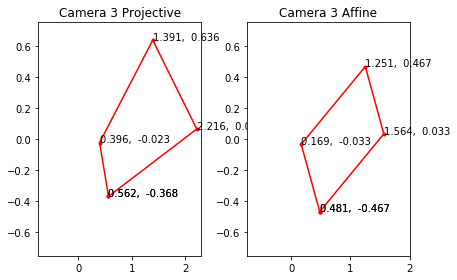

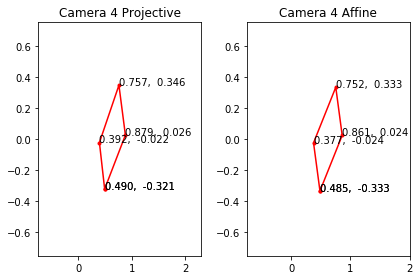

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math 
from math import cos, sin, pi 

# convert points from euclidian to homogeneous
def to_homog(points):
    # write your code here
    # missing lambda
    col = points.shape[1]
    b = np.ones((1,col))
    homo_1 = np.vstack((points,b) )
    return homo_1

# convert points from homogeneous to euclidian
def from_homog(hm):
    # write your code here  
    l = len(hm)
    col = hm.shape[1]
    if l == 3 or l == 4:
        Euc = np.zeros((len(hm)-1,col))
        for j in range(col):
        
            for i in range(len(hm)-1):
                Euc[i,j] = hm[i,j]/hm[l-1,j]
        return Euc

    else:
        print('Dimension wrong')


# project 3D euclidian points to 2D euclidian
def project_points(P_int, P_ext, pts):
    # write your code here
    #eye = np.eye(4)
    col = pts.shape[1]
    b = np.ones((1,col))
    #np.array([[1, 1, 1, 1]])
    pts = np.vstack((pts,b) )
    a = np.dot(P_int,P_ext)
    #b = np.dot(P_ext,pts)
    Euc_3D = np.dot(a,pts)
    Euc_2D = from_homog(Euc_3D)
    return Euc_2D


# Change the three matrices for the four cases as described in the problem
# in the four camera functions geiven below. Make sure that we can see the formula
# (if one exists) being used to fill in the matrices. Feel free to document with
# comments any thing you feel the need to explain. 


# Taylor Center ??????!!!!!!??!?!?!?!?!?!?!?!?!?!
TC = np.array([[0, 0, 2]]).T



def camera1():
    # write your code here
    f = 1
    TC = np.array([[0, 0, 2]]).T
    P_int_proj = np.eye(3,4)
    P_int_proj[2,2] = 1/f
    P_int_affine = np.eye(3,4)
    P_ext = np.eye(4,4)
    TC = from_homog(np.dot(P_ext,to_homog(TC)))
    x0 = TC[0]
    y0 = TC[1]
    z0 = TC[2]
    P_int_affine = np.array([[f/z0, 0, -f*x0/z0**2, f*x0/z0], 
                             [0, f/z0, -f*y0/z0**2, f*y0/z0], 
                             [0, 0, 0, 1]]) 
    return P_int_proj, P_int_affine, P_ext

def camera2(): #no rotaion 
    # write your code here
    
    f = 1
    TC = np.array([[0, 0, 2]]).T
    P_int_proj = np.eye(3,4)
    P_int_proj[2,2] = 1/f
    P_int_affine = np.eye(3,4)
    P_ext = np.eye(4,4)
    P_ext[0:3,3:] = np.array([[0, 0, 1]]).T
    TC = from_homog(np.dot(P_ext,to_homog(TC)))
    x0 = TC[0]
    y0 = TC[1]
    z0 = TC[2]
    P_int_affine = np.array([[f/z0, 0, -f*x0/z0**2, f*x0/z0], 
                             [0, f/z0, -f*y0/z0**2, f*y0/z0], 
                             [0, 0, 0, 1]]) 

    return P_int_proj, P_int_affine, P_ext

def camera3():
    # write your code here
    f = 1
    TC = np.array([[0, 0, 2]]).T
    P_int_proj = np.eye(3,4)
    P_int_proj[2,2] = 1/f
    P_int_affine = np.eye(3,4)
    P_ext = np.eye(4,4)
    #60 --pi/3  30 --pi/6
    R_AB = np.array([[cos(pi/3), 0, sin(pi/3)], 
                     [0, 1, 0], 
                     [-sin(pi/3), 0, cos(pi/3)]])
    R_BC = np.array([[cos(pi/6), -sin(pi/6), 0], 
                     [sin(pi/6), cos(pi/6), 0], 
                     [0, 0, 1]])
    P_ext[0:3,0:3] = np.dot(R_AB,R_BC)   #ROTATION MATRIX
    P_ext[0:3,3:] = np.array([[0, 0, 1]]).T    #TRANSLATION MATRIX [0,0,1].T
    TC = from_homog(np.dot(P_ext,to_homog(TC)))
    x0 = TC[0]
    y0 = TC[1]
    z0 = TC[2]
    P_int_affine = np.array([[f/z0, 0, -f*x0/z0**2, f*x0/z0], 
                             [0, f/z0, -f*y0/z0**2, f*y0/z0], 
                             [0, 0, 0, 1]]) 
    
    return P_int_proj, P_int_affine, P_ext

def camera4():    
    # write your code here
    f = 5
    TC = np.array([[0, 0, 2]]).T
    P_int_proj = np.eye(3,4)
    P_int_proj[2,2] = 1/f
    P_int_affine = np.eye(3,4)
    P_ext = np.eye(4,4)
    R_AB = np.array([[cos(pi/3), 0, sin(pi/3)], 
                     [0, 1, 0], 
                     [-sin(pi/3), 0, cos(pi/3)]])
    R_BC = np.array([[cos(pi/6), -sin(pi/6), 0], 
                     [sin(pi/6), cos(pi/6), 0], 
                     [0, 0, 1]])
    P_ext[0:3,0:3] = np.dot(R_AB,R_BC)   #ROTATION MATRIX
    P_ext[0:3,3:] = np.array([[0, 0, 13]]).T    #TRANSLATION MATRIX [0,0,1].T
    TC = from_homog(np.dot(P_ext,to_homog(TC)))
    x0 = TC[0]
    y0 = TC[1]
    z0 = TC[2]
    P_int_affine = np.array([[f/z0, 0, -f*x0/z0**2, f*x0/z0], 
                             [0, f/z0, -f*y0/z0**2, f*y0/z0], 
                             [0, 0, 0, 1]]) 
    return P_int_proj, P_int_affine, P_ext


# Use the following code to display your outputs
# You are free to change the axis parameters to better 
# display your quadrilateral but do not remove any annotations

def plot_points(points, title='', style='.-r', axis=[]):
    inds = list(range(points.shape[1]))+[0]
    plt.plot(points[0,inds], points[1,inds],style)
    
    for i in range(len(points[0,inds])):
        plt.annotate(str("{0:.3f}".format(points[0,inds][i]))+",  "+str("{0:.3f}".format(points[1,inds][i])),(points[0,inds][i], points[1,inds][i]))
    
    if title:
        plt.title(title)
    if axis:
        plt.axis(axis)
        
    plt.tight_layout()
        
def main():
    point1 = np.array([[-1,-.5,2]]).T
    point2 = np.array([[1,-.5,2]]).T
    point3 = np.array([[1,.5,2]]).T
    point4 = np.array([[-1,.5,2]]).T
    points = np.hstack((point1,point2,point3,point4))
    
    for i, camera in enumerate([camera1, camera2, camera3, camera4]):
        P_int_proj, P_int_affine, P_ext = camera()
        plt.subplot(1, 2, 1)
        plot_points(project_points(P_int_proj, P_ext, points), title='Camera %d Projective'%(i+1), axis=[-0.75,2.3,-0.75,0.75])
        plt.subplot(1, 2, 2)
        plot_points(project_points(P_int_affine, P_ext, points), title='Camera %d Affine'%(i+1), axis=[-0.75,2,-0.75,0.75])
        plt.show()

main()

# Problem 5: Homography [12 pts]

You may use eig or svd routines in python for this part of the assignment.

Consider a vision application in which components of the scene are replaced by components from another image scene. 

In this problem, we will implement partial functionality of a smartphone camera scanning application (Example: CamScanner) that, in case you've never used before, takes pictures of documents and transforms it by warping and aligning to give an image similar to one which would've been obtained through using a scanner.

The transformation can be visualized by imagining the use of two cameras forming an image of a scene with a document. The scene would be the document you're trying to scan placed on a table and one of the cameras would be your smart phone camera, forming the image that you'll be uploading and using in this assignment. There can also be an ideally placed camera, oriented in the world in such a way that the image it forms of the scene has the document perfectly algined. While it is unlikely you can hold your phone still enough to get such an image, we can use homography to transform the image you take into the image that the ideally placed camera would have taken.

This digital replacement is accomplished by a set of corresponding points for the document in both the source (your picture) and target (the ideal) images. The task then consists of mapping the points from the source to their respective points in the target image. In the most general case, there would be no constraints on the scene geometry, making the problem quite hard to solve. If, however, the scene can be approximated by a plane in 3D, a solution can be formulated much more easily even without the knowledge of camera calibration parameters. 

To solve this section of the homework, you will begin by understanding the transformation that maps one image onto another in the planar scene case. Then you will write a program that implements this transformation and use it to warp some document into a well aligned document (See the given example to understand what we mean by well aligned).

<img src="example.png">

To begin with, we consider the projection of planes in images. imagine two cameras $C_1$ and $C_2$ looking at a plane $\pi$ in the world. Consider a point $P$ on the plane $\pi$ and its projection $p=[\text{u1, v1, 1}]^T$ in the image 1 and $q=[\text{u2, v2, 1}]^T$ in image 2.

There exists a unique, upto scale, 3 $\times$ 3 matrix $H$ such that, for any point $P$:
$$q \approx Hp$$
Here $\approx$ denotes equality in homogeneous coordinates, meaning that the left and right hand sides are proportional. Note that $H$ only depends on the plane and the projection matrices of the two cameras.

The interesting thing about this result is that by using $H$ we can compute the image of $P$ that would be seen in the camera with center $C_2$ from the image of the point in the camera with center at $C_1$, without knowing the three dimensional location. Such an $H$ is a projective transformation of the plane, called a homography.

In this problem, complete the code for computeH and warp functions that can be used in the skeletal code that follows. 

There are three warp functions to implement in this assignment, example ouputs of which are shown below. In warp1, you will create a homography from points in your image to the target image (Mapping source points to target points). In warp2, the inverse of this process will be done. In warp3, you will create a homography between a given image and your image, replacing your document with the given image.

1. <img src="forward.png"> 2. <img src="inverse.png"> 3.<img src="backward.png">

1. In the context of this problem, the source image refers to the image of a document you take that needs to be replaced into the target. 
2. The target image can start out as an empty matrix that you fill out using your code.
3. You will have to implement the computeH function that computes a homography. It takes in the point correspondences between the source image and target image in homogeneous coordinates respectively and returns a 3 $\times$ 3 homography matrix.
4. You will also have to implement the three warp functions in the skeleton code given and plot the resultant image pairs. For plotting, make sure that the target image is not smaller than the source image.

Note: We have provided test code to check if your implementation for computeH is correct. All the code to plot the results needed is also provided along with the code to read in the images and other data required for this problem. Please try not to modify that code. 

You may find following python built-ins helpful:
numpy.linalg.svd, numpy.meshgrid

/Users/zhangbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.
/Users/zhangbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # Remove the CWD from sys.path while we load stuff.


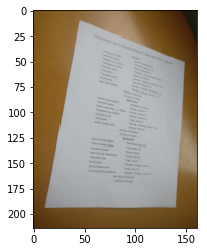

In [11]:
import numpy as np
from scipy.misc import imread, imresize
from scipy.io import loadmat
import matplotlib.pyplot as plt

# load image to be used - resize to make sure it's not too large
# You can use the given image as well
# A large image will make testing you code take longer; once you're satisfied with your result,
# you can, if you wish to, make the image larger (or till your computer memory allows you to)
source_image = imresize(imread("/Users/zhangbowen/Desktop/CSE252A/HW/HW1/HW1/photo.jpg"),.1)[:,:,:3]/255.

# display images
plt.imshow(source_image)

# Align the polygon such that the corners align with the document in your picture
# This polygon doesn't need to overlap with the edges perftectly, an approximation is fine
# The order of points is clockwise, starting from bottom left.
x_coords = [11,45,148,140] 
y_coords = [195,10,50,193]

# Plot points from the previous problem is used to draw over your image 
# Note that your coordinates will change once you resize your image again
#source_points = np.vstack((x_coords, y_coords))
#plot_points(source_points)

plt.show()

In [12]:
source_image = imresize(imread("/Users/zhangbowen/Desktop/CSE252A/HW/HW1/HW1/photo.jpg"),.1)[:,:,:3]/255.

print(source_image.shape[0])
#print(source_image[0].shape)
#print(source_image[1].shape)

214


/Users/zhangbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/Users/zhangbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


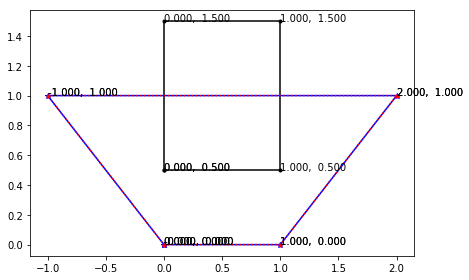

The red and blue quadrilaterals should overlap if ComputeH is implemented correctly.


In [4]:
def computeH(x, y):
    #x = source_points | y = target_points
    # returns the 3x3 homography matrix such that:
    # np.matmul(H, source_points) #~ target_points
    # where source_points and target_points are expected to be in homogeneous
    #x1--x[0,i]
    #y1--x[1,i]
    #x'--y[0,i]
    #y'--y[1,i]
    A = np.zeros((8,9))
    for i in range (4):
        xi = x[0,i]
        yi = x[1,i]
        x_dot = y[0,i]
        y_dot = y[1,i]        
        A[2*i,:] = np.array([0, 0, 0, -xi, -yi, -1, y_dot*xi, y_dot*yi, y_dot]) 
        A[2*i+1,:] = np.array([xi, yi, 1, 0, 0, 0, -xi*x_dot, -x_dot*yi, -x_dot])
    u, s, vh = np.linalg.svd(A, full_matrices=True)
    H = vh[8:,:].T             
    H = H.reshape((3,3))   
    return H
    
    # Please refer the note on DLT algorithm given at: 
    # https://cseweb.ucsd.edu/classes/wi07/cse252a/homography_estimation/homography_estimation.pdf
    
    # make sure points are 3D homogeneous
    assert x.shape[0]==3 and y.shape[0]==3
    
    pass
    
#######################################################
# test code. Do not modify
#######################################################
def test_computeH():
    source_points = np.array([[0,0.5],[1,0.5],[1,1.5],[0,1.5]]).T
    target_points = np.array([[0,0],[1,0],[2,1],[-1,1]]).T
    H = computeH(to_homog(source_points), to_homog(target_points))
    mapped_points = from_homog(np.matmul(H,to_homog(source_points)))

    plot_points(source_points,style='.-k')
    plot_points(target_points,style='*-b')
    plot_points(mapped_points,style='.:r')
    plt.show()
    print('The red and blue quadrilaterals should overlap if ComputeH is implemented correctly.')
test_computeH()

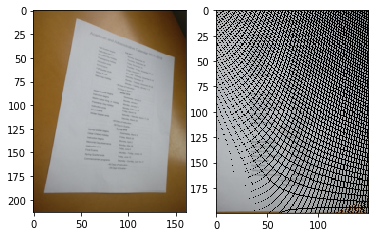

In [5]:
def warp(source_img, source_points, target_size):
    # Create a target image and select target points to create a homography from source image to target image,
    # in other words map all source points to target points and then create
    # a warped version of the image based on the homography by filling in the target image.
    # Make sure the new image (of size target_size) has the same number of color channels as source image
    assert target_size[2]==source_img.shape[2]
    #T = np.zeros((target_size))
    #T = np.ones((5,5),np.uint8)
    x = target_size[0]
    y = target_size[1]
    x_start = 10
    y_start = 10
    T = np.zeros((y+2*y_start+50,x+2*x_start+50,3)) 
    target_points = np.array([[x_start, x_start, x_start+x, x_start+x],[y_start+y, y_start, y_start, y_start+y]])
    H = computeH(to_homog(source_points), to_homog(target_points))
    xx = source_img.shape[1]
    yy = source_img.shape[0]
    #mapped_points = np.zeros((xx,yy))
    mapped_points = np.zeros((2,1))
    for i in range (xx):
        for j in range(yy):
            p = np.array([[i],[j]])    
            mapped_points = from_homog(np.matmul(H,to_homog(p))) 
            T[int(mapped_points[1]),int(mapped_points[0])] = source_img[j,i]
    

    T_hat = T[y_start: y+y_start, x_start: x+x_start]
    return T_hat
# Use the code below to plot your result
result = warp(source_image, source_points, (150,200,3))
plt.subplot(1, 2, 1)
plt.imshow(source_image)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

The output of warp1 of your code probably has some striations or noise. The larger you make your target image, the less it will resemble the document in the source image. Why is this happening? 

To fix this, implement warp2, by creating an inverse homography matrix and fill in the target image.

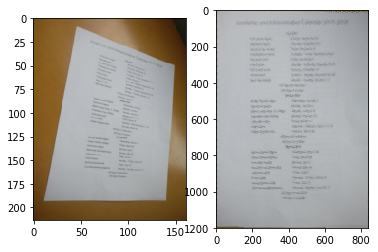

In [6]:
from numpy.linalg import inv
def warp2(source_img, source_points, target_size):
    # Create a target image and select target points to create a homography from target image to source image,
    # in other words map each target point to a source point, and then create a warped version
    # of the image based on the homography by filling in the target image.
    # Make sure the new image (of size target_size) has the same number of color channels as source image
    y = target_size[0]
    x = target_size[1]
    x_start = 100  #1000
    y_start = 100  #1300 
    T = np.zeros((y+2*y_start+50,x+2*x_start+50,3)) 
    target_points = np.array([[x_start, x_start, x_start+x, x_start+x],[y_start+y, y_start, y_start, y_start+y]])
    H = computeH(to_homog(source_points), to_homog(target_points))
    H_inv = inv(H)
    
    #xx = source_img.shape[1]
    #yy = source_img.shape[0]
    #mapped_points = np.zeros((xx,yy))
    mapped_points = np.zeros((2,1))
    for i in range (x_start, x+x_start):
        for j in range(y_start, y+y_start):
            p = np.array([[i],[j]])    
            mapped_points = from_homog(np.matmul(H_inv,to_homog(p))) 
            
            T[j,i] = source_img[int(mapped_points[1]),int(mapped_points[0])]
    
    T_hat = T[y_start: y+y_start, x_start: x+x_start]
    return T_hat



# Use the code below to plot your result
size_factor = 2
result = warp2(source_image, source_points, (600*size_factor,420*size_factor,3))
plt.subplot(1, 2, 1)
plt.imshow(source_image)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

Try playing around with the size of your target image in warp1 versus in warp2, additionally you can also implement nearest pixel interpolation or bi-linear interpolations and see if that makes a difference in your output.

In warp3, you'll be replacing the document in your image with a provided image. Read in "ucsd_logo.png" as the source image, keeping your document as the target. 

/Users/zhangbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


(200, 200, 3)


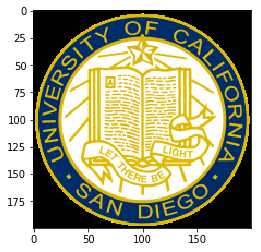

In [7]:
source_image2 = imread('/Users/zhangbowen/Desktop/CSE252A/HW/HW1/HW1/ucsd_logo.png')[:,:,:3]/255.
plt.imshow(source_image2)
print(source_image2.shape)

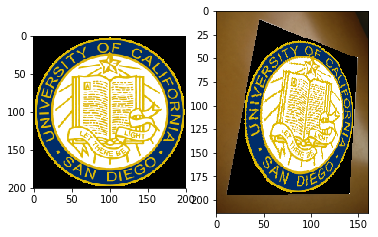

In [9]:
# Load the given UCSD logo image
def inside_polygon(x, y, points):
    n = len(points)
    inside = False
    p1x, p1y = points[0]
    for i in range(1, n + 1):
        p2x, p2y = points[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xinters:
                        inside = not inside
        p1x, p1y = p2x, p2y
    return inside
def warp3(target_image, target_points, source_image):
    pass    
    x = source_image.shape[1]
    y = source_image.shape[0]
    xx = target_image.shape[1]
    yy = target_image.shape[0]
    x_start = 0
    y_start = 0
    Extend_image = np.ones((y+2*y_start+100,x+2*x_start+100,3)) #add logo to a black background
    Extend_image[y_start:y+y_start , x_start:x+x_start] = source_image
    ucsd_pts = np.array([[x_start, x_start, x_start+x, x_start+x],[y_start+y, y_start, y_start, y_start+y]])
    #H_inv = inv(H)
    H = computeH(to_homog(target_points), to_homog(ucsd_pts))
    zeros = np.zeros((1,3))
    mask = np.ones((target_image.shape))
    for i in range (xx):
        for j in range(yy):
            if inside_polygon(i, j, source_points.T) == True:
                p = np.array([[i],[j]])  
                mapped_points = from_homog(np.matmul(H,to_homog(p))) #logo to polygon
                mask[j,i] = Extend_image[int(mapped_points[1]),int(mapped_points[0])] #black background tilted logo | target size
                target_image[j,i] = zeros

    #New_target = cv2.add(target_image,mask)
    New_target = target_image + mask
    
    return New_target

# Use the code below to plot your result
New_target = warp3(source_image, source_points, source_image2)

plt.subplot(1, 2, 1)
plt.imshow(source_image2)
plt.subplot(1, 2, 2)
plt.imshow(New_target)
plt.show()